# Hackathon

## Util Fns

In [55]:
import string

In [56]:
def create_encryptor(n):
    '''Takes a number from 1 - 26 and returns the substitution dictionary right shifted by the number'''
    d = {}
    lowercase_letters = string.ascii_lowercase[n:] + string.ascii_lowercase[:n]
    for i in range(len(lowercase_letters)):
        d[string.ascii_lowercase[i]] = lowercase_letters[i]
    return d

In [57]:
create_encryptor(4)

{'a': 'e',
 'b': 'f',
 'c': 'g',
 'd': 'h',
 'e': 'i',
 'f': 'j',
 'g': 'k',
 'h': 'l',
 'i': 'm',
 'j': 'n',
 'k': 'o',
 'l': 'p',
 'm': 'q',
 'n': 'r',
 'o': 's',
 'p': 't',
 'q': 'u',
 'r': 'v',
 's': 'w',
 't': 'x',
 'u': 'y',
 'v': 'z',
 'w': 'a',
 'x': 'b',
 'y': 'c',
 'z': 'd'}

- The above dictionary is used to represent the Caesar cipher for letter 'd' (as letter 'a' corresponds to Caesar cipher with a right shift of 1)
- The value for key 'z' of the returned dictionary gives the letter (call it passletter) corresponding to the cipher

## Main Functions

In [58]:
def textstrip(filename):
    '''This takes the file and converts it to a string with all the spaces and other
    special characters removed. What remains is only the lower case letters,
    retain only the lowercase letters!
    '''
    file = open(filename, "r")
    text = file.read()
    stripped_text = ""
    for letter in text:
        if letter.isalpha() and letter.isascii():
            stripped_text += letter.lower()
    return stripped_text

In [59]:
def letter_distribution(s):
    '''Consider the string s which comprises of only lowercase letters. Count
    the number of occurrences of each letter and return a dictionary'''
    d = {}
    for letter in s:
        if letter in d:
            d[letter] += 1
        else:
            d[letter] = 1

    return d

In [60]:
def substitution_encrypt(s, d):
    '''encrypt the contents of s by using the dictionary d which comprises of
    the substitutions for the 26 letters. Return the resulting string'''
    encrypted = ""
    for letter in s:
      encrypted += d[letter]
    return encrypted

In [61]:
def substitution_decrypt(s, d):
    '''decrypt the contents of s by using the dictionary d which comprises of
    the substitutions for the 26 letters. Return the resulting string'''
    d_inverted = {v: k for k, v in d.items()}
    decrypted = ""
    for letter in s:
        decrypted += d_inverted[letter]
    return decrypted

In [62]:
def vigenere_encrypt(s, password):
    '''Encrypt the string s based on the password the vigenere cipher way and
    return the resulting string'''
    encryptors = []
    encrypted_text = ""
    for i in password:
        encryptors.append(create_encryptor(string.ascii_lowercase.index(i) + 1))
    for i in range(len(s)):
        encrypted_text += encryptors[i % len(password)][s[i]]
    return encrypted_text

In [63]:
def vigenere_decrypt(s, password):
    '''Decrypt the string s based on the password the vigenere cipher way and
    return the resulting string'''
    decryptors = []
    decrypted_text = ""
    for i in password:
        decryptors.append({v: k for k, v in create_encryptor(string.ascii_lowercase.index(i) + 1).items()})
    for i in range(len(s)):
        decrypted_text += decryptors[i % len(password)][s[i]]
    return decrypted_text

In [64]:
def cryptanalyse_substitution(s):
    '''Given that the string s is given to us and it is known that it was
    encrypted using some substitution cipher, predict the d'''
    distribution = letter_distribution(s)
    most_frequent_letter = sorted(distribution.items(), key=lambda item: item[1], reverse=True)[0][0]
    jumps = string.ascii_lowercase.index(most_frequent_letter) - string.ascii_lowercase.index("e")
    if jumps < 0:
        jumps = 26 - 5 + (string.ascii_lowercase.index(most_frequent_letter) + 1)
    return create_encryptor(jumps)

In [65]:
def rotate_compare(s,r):
    '''This rotates the string s by r places and compares s(0) with s(r) and
    returns the proportion of collisions'''
    temp=s[r:]+s[:r]
    count=0
    for i in range(len(s)):
        if s[i] == temp[i]:
            count += 1
    return (count/len(s))

In [66]:
def cryptanalyse_vigenere_findlength(s):
    '''Given just the string s, find out the length of the password using which
    some text has resulted in the string s. We just need to return the number
    k'''
    for i in range(3, 30): # Assuming password length from 3 to 29 both inclusive
        col_prob = rotate_compare(s, i)
        # Threshold relating to index of coincidence
        if col_prob > 0.06:
            return i

In [67]:
def cryptanalyse_vigenere_afterlength(s, k):
    '''Given the string s which is known to be vigenere encrypted with a
    password of length k, find out what is the password'''
    password = ""
    substrings = ["" for i in range(k)]
    for i in range(len(s)):
        substrings[i % k] += s[i] # Separating into monoalphabetic substitution cipher encrypted substrings
    for i in substrings:
        encryptor = cryptanalyse_substitution(i)
        password += encryptor["z"]
    return password

In [68]:
def cryptanalyse_vigenere(s):
    '''Given the string s cryptanalyse vigenere, output the password as well as
    the plaintext'''
    k = cryptanalyse_vigenere_findlength(s)
    password = cryptanalyse_vigenere_afterlength(s, k)
    decrypted = vigenere_decrypt(s, password)
    
    return password, decrypted

## Testing

In [69]:
stripped_sherlock = textstrip("sherlock.txt")

In [70]:
encrypted = vigenere_encrypt(stripped_sherlock, "arnd")
encrypted

'dgbxffhwdzotuwfqskvisdcglzcpnwggisdxfjhlfuivtwcjuzsfbkyisnwpmwggisdxfjhlfhfscdsqdzotuwfwjjviojmfbkyisnwpmwqlbhhislvvfwpvpcsruzfibvggisdxfjpetcsvwazpfzopmuveqlsvuzswusdpflcrtgtqfjfmqahlpmgidzotuwfjjjgxswdsslcjejkeukcrdzotuwfxiwzmhzhyqgbxiwaspjgidgbhswdsslcjejkeukcrdzotuwfiylfedltvpehlfvwesqcjejkeukcrdzotuwfxiwaeogbxiwhssuveqlsvewoxigbxiwaspjqlbhhisxwbjfuxiwbiukqlbhhislviigiregtxiwpetcsvwazpfkqlbhhissfiujcwqwqxjgbgisdxfjavtzsvmgqoigzqfkavtzsvmgqoigzqfkklpoowvkiemdmzfjmpblsmolvingfrjfuwtsjivhcruzcwffcxjftvfiiiolcgdsgmpfgaiwblfoowvhopmfwkilketkseuwreulvicjselxowulofmwwwugchvhcruzslfsfxijikbfrtjuyiemdxiwgxjuyaiaqlpmfzjkwxpjveedsjutsljfrljehlffwkilpiggfijlketstmowhljuytjwqipxkspvpymtcytzseewrsglvitgfxxzwgiagoogkrbkotfforhdoazwfnvkhyovsvuzslfsrabkofsgohtazzfjpeovbibjzcbfwrdzogsggwugxenwgqpjhmnwfqsugjsgaljktvjwbhtgtxiwqgioowffuvbnshvhcrjlkmuzhlfvoxfahabkxytlgydzowuaqobkhlfgzhgsgljgbiexoqjdmtssqxjlwsowfytwrxpuovsqrmhfwjjwrwpdwhbfrvfsgwvjwrhospmooxtgbaishhpqcynsyipxwxigzqfkketkwxuabkxahliagfbuy

In [71]:
cryptanalyse_vigenere(encrypted)

('arnd',
 'contentschaptermrsherlockholmeschapterthecurseofthebaskervilleschaptertheproblemchaptersirhenrybaskervillechapterthreebrokenthreadschapterbaskervillehallchapterthestapletonsofmerripithousechapterfirstreportofdrwatsonchapterthelightuponthemoorsecondreportofdrwatsonchapterextractfromthediaryofdrwatsonchapterthemanonthetorchapterdeathonthemoorchapterfixingthenetschapterthehoundofthebaskervilleschapteraretrospectionchaptermrsherlockholmesmrsherlockholmeswhowasusuallyverylateinthemorningssaveuponthosenotinfrequentoccasionswhenhewasupallnightwasseatedatthebreakfasttableistooduponthehearthrugandpickedupthestickwhichourvisitorhadleftbehindhimthenightbeforeitwasafinethickpieceofwoodbulbousheadedofthesortwhichisknownasapenanglawyerjustundertheheadwasabroadsilverbandnearlyaninchacrosstojamesmortimermrcsfromhisfriendsofthecchwasengraveduponitwiththedateitwasjustsuchastickastheoldfashionedfamilypractitionerusedtocarrydignifiedsolidandreassuringwellwatsonwhatdoyoumakeofitholmeswassittingw

### Test with second file

In [72]:
stripped_alice = textstrip("alice29.txt")

In [73]:
encrypted_2 = vigenere_encrypt(stripped_alice, "mdjuiite")
encrypted_2

'npsxnbuiiixodayxvrgjwmywyexyunqnfgkmaxfqglohrufjarspvooqpvehnmcyvsxxqjjyrvsyxfhyuibvkkcyusvzjuchraknknanarsipcilrxfzahnneinjobcygmxbkhbjewsncnltaxrzkjhpnrnjoquavrqixcbnakdjmxispiymcfchrwrzqjxurizzmrhybxrzkxipuibnrbnjeaknanuivrqwdccyuenixychgybzbxlhbrfzabuyvsxnrwcynrnrqjnnfxrzdbytseljxtnmbyqccjfnpigdcqizgtsxcdljfsbxxwpjewkorxhxbwrzfjmhbrcdmnlnaksiqnltjrwdwmuxjivgjbmmrgypumztexrzqxnincwvmnbjejozueywlwvznysfahcodycijlooqnlyuizgnjmzeiyavjenakkyjrmdplkdwfizyhlzfxlyuxrzcaizopojopyygmxbdyusqtsxtrhlgloyjrmnrwgcnwmzqhoiuhubumdzajvgvxgdcqjnaootnblfagvjbnvduiboqnljjecixcbnakcjenldeiwvatugyisicquyasbyrmuqvgooqrhpvxcjenldzymcxdntsxrzfjsyblovacbjeelwrcmflxydcbyqssrynjltuhovarmmnpvwnuuyrarzwbbjglyppqnngsfzajzyrvgvammngsmxdaljqxycnanmnxccnxoluxdjqjpjjsxynayinxdcrbvzgedoqnnnzisojufxriwzmzongixvcdlfyfeofqysglomjkvngemodjfqlxyjtjqfggrjdcikvxcrjrmypskoyxwprxkimuitxinvcrnfahdcnwbzevszmxhfymmzbcuwginoxqywsioooxlngjvvbqyingbjbbbjeqsimcbfgwrzqjxsrzomknzteicznwuwnfldcfcyuisoqnlfjesnclifgtyxtnnteegvclbybxkfnxo

In [74]:
cryptanalyse_vigenere(encrypted_2)

('mdjuiite',
 'alicesadventuresinwonderlandlewiscarrollthemillenniumfulcrumeditionchapteridowntherabbitholealicewasbeginningtogetverytiredofsittingbyhersisteronthebankandofhavingnothingtodoonceortwiceshehadpeepedintothebookhersisterwasreadingbutithadnopicturesorconversationsinitandwhatistheuseofabookthoughtalicewithoutpicturesorconversationsoshewasconsideringinherownmindaswellasshecouldforthehotdaymadeherfeelverysleepyandstupidwhetherthepleasureofmakingadaisychainwouldbeworththetroubleofgettingupandpickingthedaisieswhensuddenlyawhiterabbitwithpinkeyesranclosebyhertherewasnothingsoveryremarkableinthatnordidalicethinkitsoverymuchoutofthewaytoheartherabbitsaytoitselfohdearohdearishallbelatewhenshethoughtitoverafterwardsitoccurredtoherthatsheoughttohavewonderedatthisbutatthetimeitallseemedquitenaturalbutwhentherabbitactuallytookawatchoutofitswaistcoatpocketandlookedatitandthenhurriedonalicestartedtoherfeetforitflashedacrosshermindthatshehadneverbeforeseenarabbitwitheitherawaistcoatpocketor

## Theory

### Distribution

In [75]:
import matplotlib.pyplot as plt

In [76]:
distribution = letter_distribution(stripped_sherlock)

In [77]:
sorted_distribution = dict(sorted(distribution.items(), key=lambda item: item[0], reverse=False))

<BarContainer object of 26 artists>

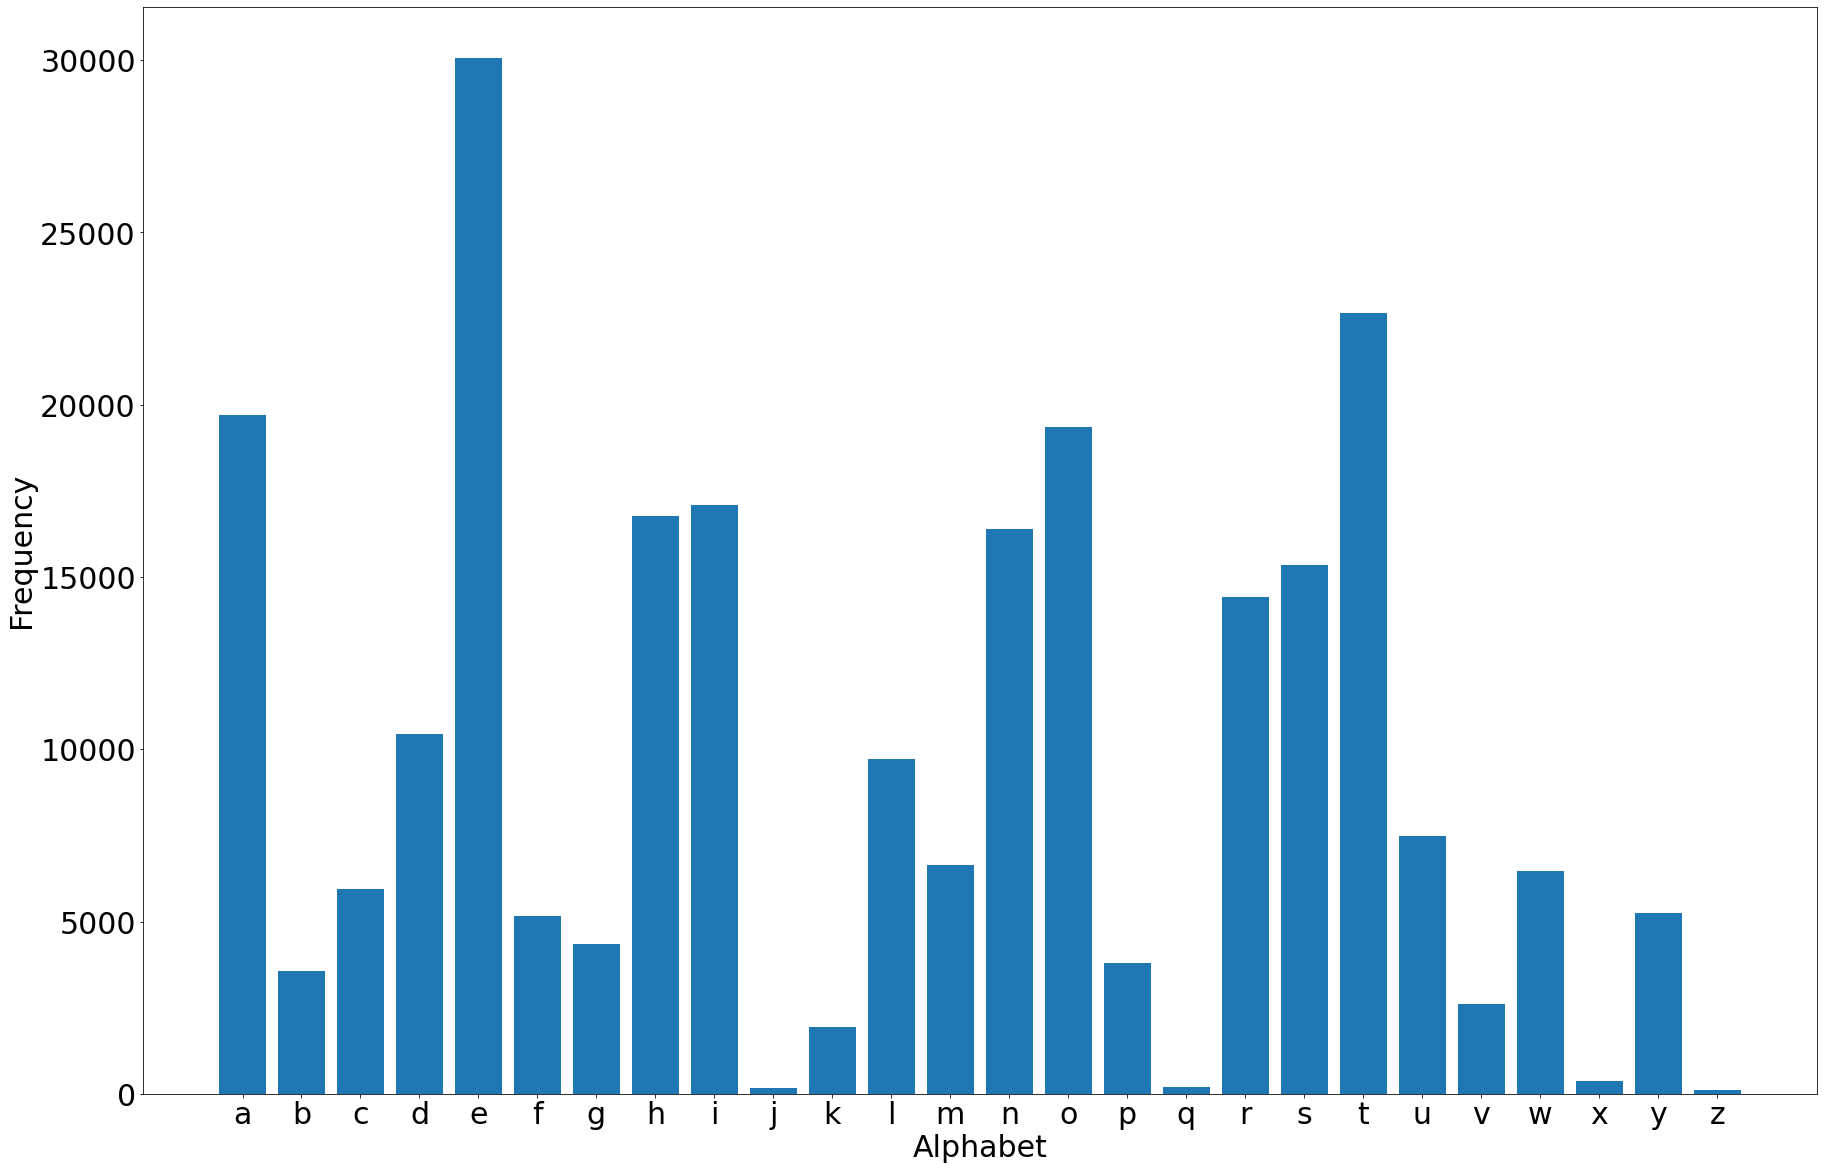

In [78]:
plt.figure(figsize=(30, 20))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel("Alphabet", fontsize=30)
plt.ylabel("Frequency", fontsize=30)

plt.bar(sorted_distribution.keys(), sorted_distribution.values())

- We use the fact that "e" is the most frequently occuring letter in any large enough corpus to find the encrypting dictionary in "cryptanalyse_substitution"

### Length of Password

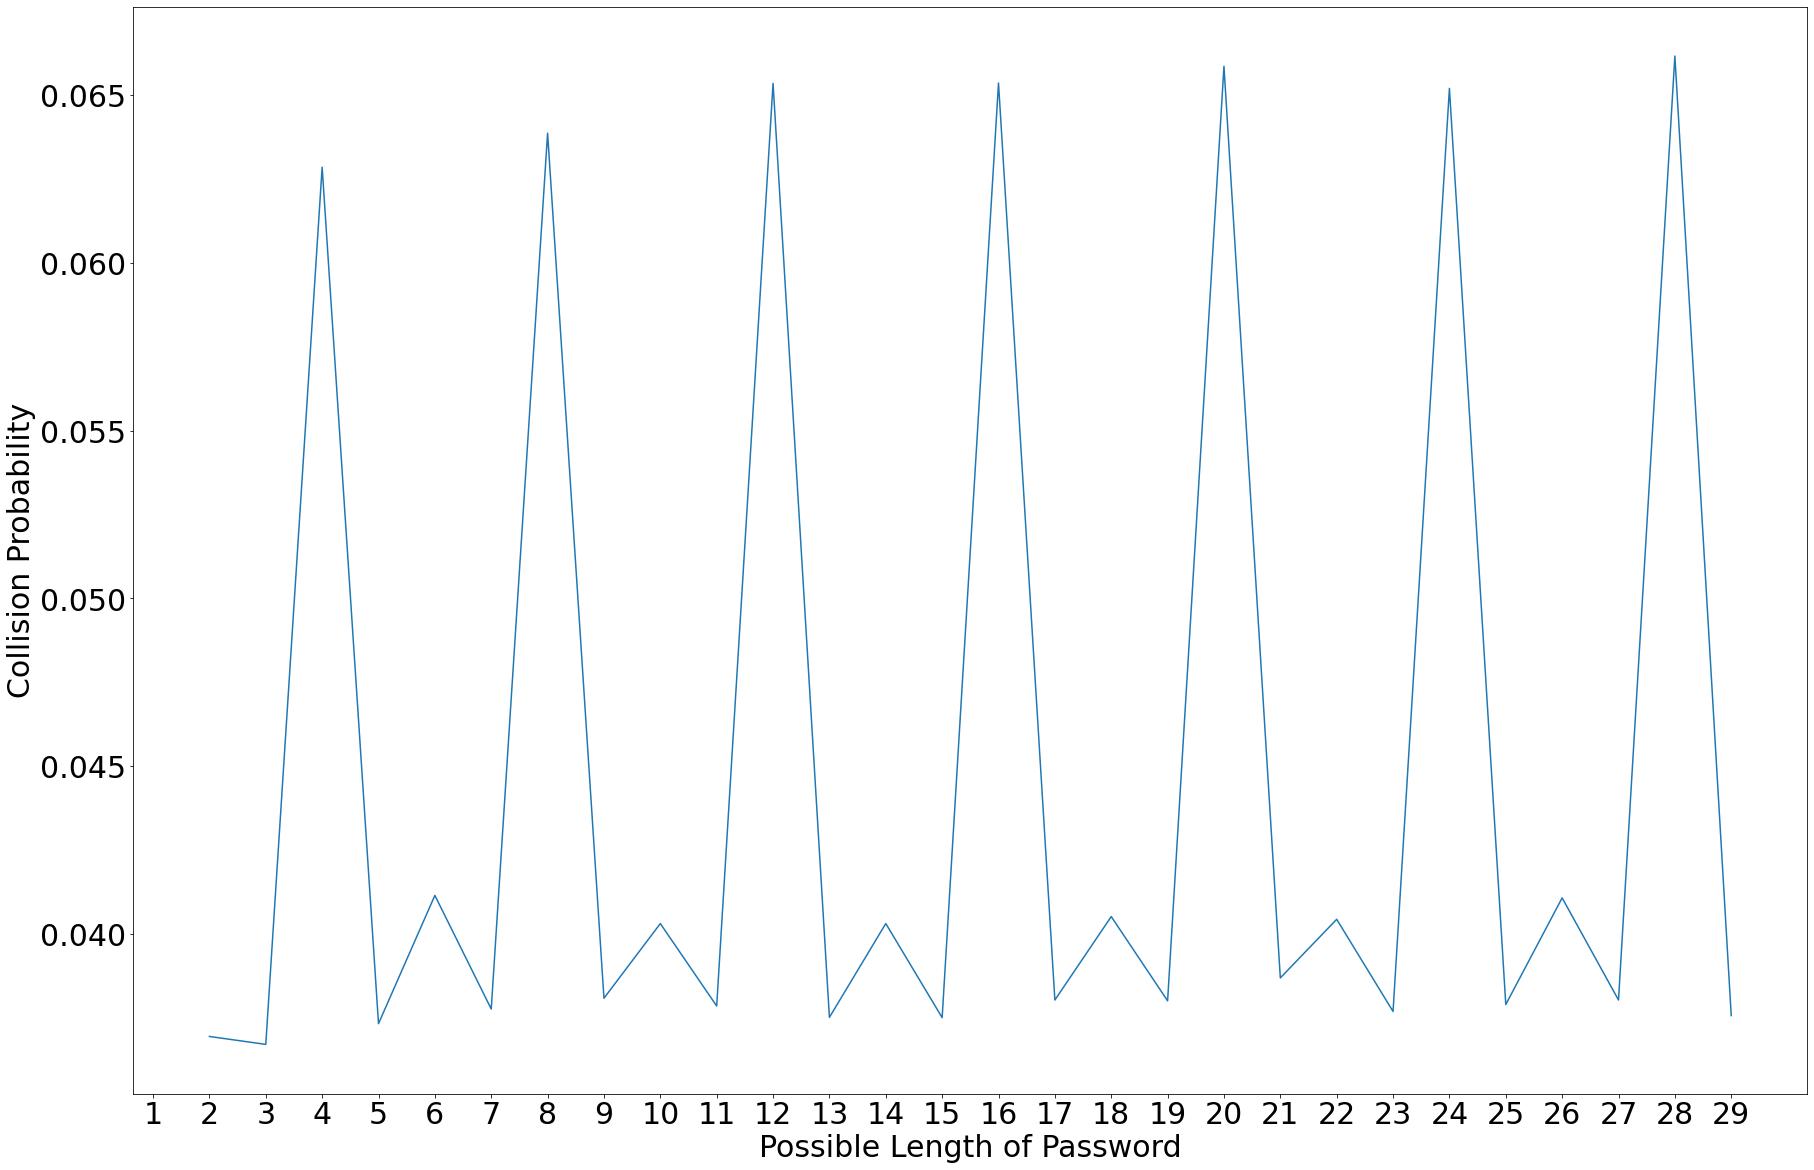

In [79]:
L = []
for i in range(2, 30):
    L.append(rotate_compare(encrypted, i))
    
plt.figure(figsize=(30, 20))
plt.xticks(range(30),fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel("Possible Length of Password", fontsize=30)
plt.ylabel("Collision Probability", fontsize=30)

plt.plot(list(range(2, 30)), L)

- From the above graph, it is clear that there exists a peak (close to Index of Coincidence, see below) of collision ratio for integral multiples of length of password (3 in this case). 

### Checking IoC

In [80]:
def check_ioc(text, d):
    sum = 0
    for i in d.values():
        sum += (i * (i - 1)) / (len(text) * (len(text) - 1))
    return sum

In [81]:
check_ioc(stripped_sherlock, letter_distribution(stripped_sherlock))

0.06539124457092242